<a href="https://colab.research.google.com/github/BitnooriLee/ML-project-Thermal-Conductivity-Prediction/blob/main/Master_Thesis_part1_w_generated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')

# specify the path to the .xlsx files
path = '/content/gdrive/My Drive/MasterThesis2023/data/simulated and realdata low density/'

# list to store the data from each .xlsx file
data_frames_parameters = []
data_frames_results = []
data_frames_T_t = []

# loop through each .xlsx file in the path
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(path, file)
        try:
            # read the 'Parameters' sheet from the current .xlsx file
            df_parameters = pd.read_excel(file_path, sheet_name='Parameters',header=1, engine='openpyxl')
            df_results = pd.read_excel(file_path, sheet_name='Results',header=1, engine='openpyxl')
            df_T_t = pd.read_excel(file_path, sheet_name='T-t',header=3, engine='openpyxl')
            # add the data from the current .xlsx file to the list of data_frames
            data_frames_parameters.append(df_parameters)
            data_frames_results.append(df_results)
            data_frames_T_t.append(df_T_t.T)
        except FileNotFoundError:
            print(f"The file {file_path} was not found. Skipping...")

# concatenate all the data from the data_frames list into one dataframe
result_parameters = pd.concat(data_frames_parameters)
result_results = pd.concat(data_frames_results)
result_T_t = pd.concat(data_frames_T_t)

# remove duplicates
result_parameters = result_parameters[result_parameters.index == 0]
result_results = result_results[result_results.index == 0]

# write the result dataframe to a new excel file
result_parameters.to_excel("combined_data_parameters.xlsx", index=False)
result_results.to_excel("combined_data_results.xlsx", index=False)

# read the combined data from the newly created excel file
combined_data_parameters = pd.read_excel("combined_data_parameters.xlsx", engine='openpyxl')
combined_data_results = pd.read_excel("combined_data_results.xlsx", engine='openpyxl')

combined_data_parameters_select = combined_data_parameters[['File','Outp.power.','Radius']] # removed TCR

combined_data_results_select = combined_data_results[['File','Th.Conductivity']] #removed Disk Res

merged_result = pd.merge(combined_data_parameters_select, combined_data_results_select, on='File')

merged_result[['Th.Conductivity','Outp.power.','Radius' ]] = merged_result[['Th.Conductivity','Outp.power.','Radius' ]].apply(lambda x: pd.to_numeric(x)) # removed TCR

# list to store the data from each .xlsx file
data_frames_T_t_time = []
data_frames_T_t_temp = []

# loop through each .xlsx file in the path
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(path, file)
        try:
            # read the 'Parameters' sheet from the current .xlsx file
            df_T_t_new = pd.read_excel(file_path, sheet_name='T-t',header=3, engine='openpyxl')

            # add a new column 'File' to the dataframe
            df_T_t_new['File'] = file

            if 'Time' in df_T_t_new.columns and 'Temp' in df_T_t_new.columns:
                data_frames_T_t_time.append(df_T_t_new[['Time']].transpose())
                data_frames_T_t_temp.append(df_T_t_new[['Temp']].transpose())

        except FileNotFoundError:
            print(f"The file {file_path} was not found. Skipping...")

# concatenate all the data from the data_frames list into one dataframe

result_T_t_time = pd.concat(data_frames_T_t_time, axis=0)
result_T_t_temp = pd.concat(data_frames_T_t_temp, axis=0)


# write the result dataframe to a new excel file
result_T_t_time.to_excel("combined_data_T_t_time.xlsx", index=False)
result_T_t_temp.to_excel("combined_data_T_t_temp.xlsx", index=False)

# read the combined data from the newly created excel file
combined_data_T_t_time = pd.read_excel("combined_data_T_t_time.xlsx", engine='openpyxl')
combined_data_T_t_temp = pd.read_excel("combined_data_T_t_temp.xlsx", engine='openpyxl')
combined_data_T_t_time = combined_data_T_t_time.iloc[:, 50:150]
combined_data_T_t_temp = combined_data_T_t_temp.iloc[:, 50:150]

combined_data_T_t_time_sqrt = combined_data_T_t_time**(1/2)


time_temp_result = pd.concat([combined_data_T_t_time, combined_data_T_t_temp], axis=1)
time_temp_result_sqrt = pd.concat([combined_data_T_t_time_sqrt, combined_data_T_t_temp], axis=1)

n = combined_data_T_t_time.shape[1]

# create a list of column indices in the desired order
column_indices = [i//2 + n*(i%2) for i in range(2*n)]

# shuffle the DataFrame columns using the list of indices
time_temp_result_shuffled = time_temp_result.iloc[:, column_indices]

# print the shuffled DataFrame
time_temp_result_shuffled

# normalized temp
normalized_factor =merged_result['Outp.power.']/merged_result['Radius'] #pow/radious
normalized_factor.to_frame()
result_T_t_temp_normalized = result_T_t_temp.mul(normalized_factor[0], axis=0)

result_T_t_temp_normalized.to_excel("combined_data_T_t_temp_normalized.xlsx", index=False)

# read the combined data from the newly created excel file

combined_data_T_t_temp_normalized = pd.read_excel("combined_data_T_t_temp_normalized.xlsx", engine='openpyxl')
combined_data_T_t_temp_normalized = combined_data_T_t_temp_normalized.iloc[:, 50:150]

time_temp_result_normalized = pd.concat([combined_data_T_t_time, combined_data_T_t_temp_normalized], axis=1)

merge_t_parameter_result_normalized = pd.concat([time_temp_result_normalized, merged_result], axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('File', axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('Outp.power.', axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('Radius', axis=1)

merge_t_parameter_result = pd.concat([time_temp_result, merged_result], axis=1)
merge_t_parameter_result =  merge_t_parameter_result.drop('File', axis=1)

merge_t_parameter_result_sqrt = pd.concat([time_temp_result_sqrt, merged_result], axis=1)
merge_t_parameter_result_sqrt =  merge_t_parameter_result_sqrt.drop('File', axis=1)

merge_t_parameter_shuffled_result = pd.concat([time_temp_result_shuffled, merged_result], axis=1)
merge_t_parameter_shuffled_result = merge_t_parameter_shuffled_result.drop('File', axis=1)

Mounted at /content/gdrive


In [2]:
merge_t_parameter_shuffled_result

,50,50,51,51,52,52,53,53,54,54,...,146,147,147,148,148,149,149,Outp.power.,Radius,Th.Conductivity
0,10.198341,2.295141,10.398309,2.316631,10.598276,2.337663,10.798244,2.358301,10.998211,2.378783,...,3.427339,29.595187,3.433681,29.795155,3.440022,29.995122,3.446356,10.000,6.403,0.022209
1,10.200000,2.346259,10.400000,2.368210,10.600000,2.389238,10.800000,2.410263,11.000000,2.431012,...,3.585749,29.600000,3.593976,29.800000,3.601866,30.000000,3.609106,12.000,6.403,0.031713
2,10.200000,2.280373,10.400000,2.299788,10.600000,2.318890,10.800000,2.337379,11.000000,2.355580,...,3.379350,29.600000,3.385881,29.800000,3.392610,30.000000,3.399996,15.000,6.403,0.046239
3,163.200000,1.828369,166.400000,1.844303,169.600000,1.859928,172.800000,1.875268,176.000000,1.890364,...,2.843973,473.600000,2.851498,476.800000,2.858760,480.000000,2.866252,60.000,29.520,0.033831
4,163.199995,2.018114,166.399995,2.032841,169.599995,2.046818,172.799995,2.060793,175.999995,2.074664,...,2.855641,473.599985,2.861545,476.799985,2.866989,479.999985,2.872781,20.000,14.610,0.035857
5,40.000000,2.473800,40.800000,2.493500,41.600000,2.513200,42.400000,2.532900,43.200000,2.552600,...,3.739500,117.600000,3.747800,118.400000,3.756000,119.200000,3.764100,0.010,6.403,0.030000
6,40.000000,1.968800,40.800000,1.984000,41.600000,1.999300,42.400000,2.014500,43.200000,2.029800,...,2.918500,117.600000,2.924600,118.400000,2.930600,119.200000,2.936600,0.020,6.403,0.080000
7,40.000000,1.940900,40.800000,1.959100,41.600000,1.977300,42.400000,1.995500,43.200000,2.013700,...,3.098000,117.600000,3.105600,118.400000,3.113100,119.200000,3.120500,0.003,6.403,0.010000
8,40.000000,1.676600,40.800000,1.689600,41.600000,1.702700,42.400000,1.715800,43.200000,1.728900,...,2.491000,117.600000,2.496200,118.400000,2.501300,119.200000,2.506400,0.015,6.403,0.070000
9,40.000000,1.940800,40.800000,1.956000,41.600000,1.971300,42.400000,1.986500,43.200000,2.001800,...,2.891500,117.600000,2.897600,118.400000,2.903600,119.200000,2.909600,0.015,6.403,0.060000


In [3]:
merge_t_parameter_result_normalized

,50,51,52,53,54,55,56,57,58,59,...,141,142,143,144,145,146,147,148,149,Th.Conductivity
0,10.198341,10.398309,10.598276,10.798244,10.998211,11.198179,11.398146,11.598114,11.798081,11.998049,...,5.301045,5.311573,5.321903,5.332270,5.342562,5.352708,5.362613,5.372517,5.382408,0.022209
1,10.200000,10.400000,10.600000,10.800000,11.000000,11.200000,11.400000,11.600000,11.800000,12.000000,...,5.538386,5.550917,5.563101,5.575266,5.587385,5.600108,5.612957,5.625279,5.636586,0.031713
2,10.200000,10.400000,10.600000,10.800000,11.000000,11.200000,11.400000,11.600000,11.800000,12.000000,...,5.221198,5.232806,5.244233,5.256165,5.267312,5.277760,5.287960,5.298469,5.310005,0.046239
3,163.200000,166.400000,169.600000,172.800000,176.000000,179.200000,182.400000,185.600000,188.800000,192.000000,...,4.382092,4.393925,4.405520,4.417473,4.429643,4.441625,4.453378,4.464720,4.476420,0.033831
4,163.199995,166.399995,169.599995,172.799995,175.999995,179.199994,182.399994,185.599994,188.799994,191.999994,...,4.416502,4.425217,4.433681,4.442142,4.451204,4.459849,4.469070,4.477572,4.486617,0.035857
5,40.000000,40.800000,41.600000,42.400000,43.200000,44.000000,44.800000,45.600000,46.400000,47.200000,...,5.774793,5.788068,5.801187,5.814306,5.827268,5.840231,5.853194,5.866000,5.878651,0.030000
6,40.000000,40.800000,41.600000,42.400000,43.200000,44.000000,44.800000,45.600000,46.400000,47.200000,...,4.510386,4.520069,4.529752,4.539278,4.548649,4.558020,4.567546,4.576917,4.586288,0.080000
7,40.000000,40.800000,41.600000,42.400000,43.200000,44.000000,44.800000,45.600000,46.400000,47.200000,...,4.778854,4.790879,4.802905,4.814931,4.826644,4.838357,4.850226,4.861940,4.873497,0.010000
8,40.000000,40.800000,41.600000,42.400000,43.200000,44.000000,44.800000,45.600000,46.400000,47.200000,...,3.849289,3.857723,3.866000,3.874122,3.882243,3.890364,3.898485,3.906450,3.914415,0.070000
9,40.000000,40.800000,41.600000,42.400000,43.200000,44.000000,44.800000,45.600000,46.400000,47.200000,...,4.467906,4.477745,4.487428,4.496955,4.506325,4.515852,4.525379,4.534749,4.544120,0.060000


In [4]:
merge_t_parameter_result.columns = merge_t_parameter_result.columns.astype(str)
merge_t_parameter_shuffled_result.columns = merge_t_parameter_shuffled_result.columns.astype(str)
merge_t_parameter_result_sqrt.columns = merge_t_parameter_result_sqrt.columns.astype(str)
merge_t_parameter_result_normalized.columns = merge_t_parameter_result_normalized.columns.astype(str)

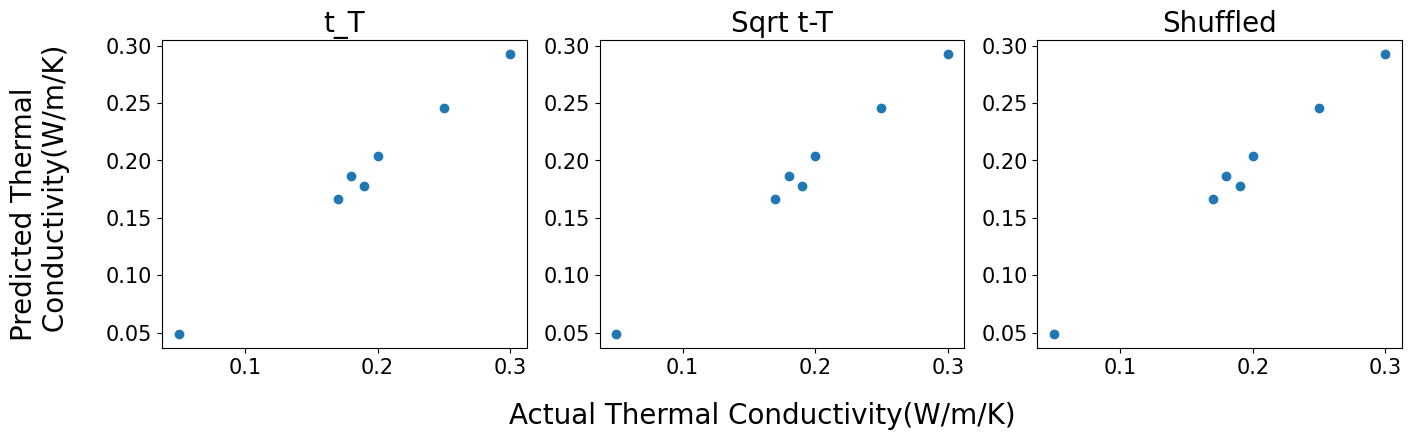

+------------+-----------------------+--------------------+
| Data Type  |   Mean Squared Error  |  R-squared score   |
+------------+-----------------------+--------------------+
|    t-T     | 3.993920557670053e-05 | 0.992209311014099  |
| Square t-T | 3.993920557670053e-05 | 0.992209311014099  |
|  Shuffled  | 3.993919901420006e-05 | 0.9922093122942046 |
+------------+-----------------------+--------------------+
0.0 & 0.992
0.0 & 0.992
0.0 & 0.992


In [5]:
#Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Import the data with 200 data points of temperature versus time and n independent parameters for each of the 48 materials

merge_t_parameter_shuffled_result = merge_t_parameter_shuffled_result.apply(pd.to_numeric, errors='coerce')



# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result.iloc[:, :-1]
y_sqrt = merge_t_parameter_result.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]



# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)




# Train a linear regression model
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()


regressor1.fit(X_train_t_T, y_train_t_T)
regressor2.fit(X_train_sqrt,y_train_sqrt)
regressor3.fit(X_train_shuffled, y_train_shuffled)


# Make predictions on the testing data
y_pred_t_T = regressor1.predict(X_test_t_T)
y_pred_sqrt = regressor2.predict(X_test_sqrt)
y_pred_shuffled = regressor3.predict(X_test_shuffled)



# Set up the plot grid

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)


# Add title to each subplot
axs[0].set_title('t_T',fontsize=20)
axs[1].set_title('Sqrt t-T',fontsize=20)
axs[2].set_title('Shuffled',fontsize=20)

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)


# Set common x and y labels for the plot grid
fig.text(0.5, -0.08, "Actual Thermal Conductivity(W/m/K)", ha='center',fontsize=20)
fig.text(0.03, 0.5, "Predicted Thermal \n Conductivity(W/m/K)", va='center', rotation='vertical',fontsize=20)

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)





from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, regressor2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, regressor3.score(X_test_shuffled, y_test_shuffled)])




# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', regressor2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', regressor3.score(X_test_shuffled, y_test_shuffled).round(3))

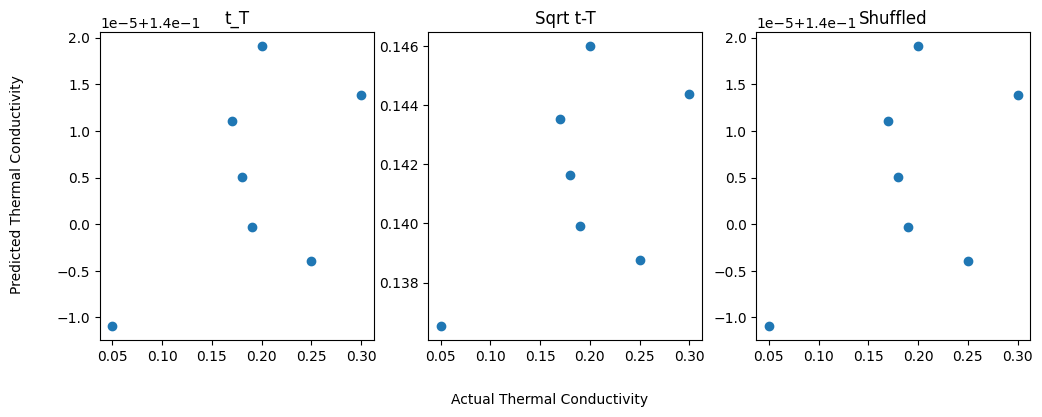

+------------+----------------------+----------------------+
| Data Type  |  Mean Squared Error  |   R-squared score    |
+------------+----------------------+----------------------+
|    t-T     | 0.007770165250704074 | -0.5156771388714159  |
| Square t-T | 0.007382491877997491 | -0.44005613862212223 |
|  Shuffled  | 0.007770165250704073 | -0.5156771388714156  |
+------------+----------------------+----------------------+
0.008 & -0.516
0.007 & -0.44
0.008 & -0.516


In [6]:
#SVR

from sklearn.svm import SVR
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result_sqrt.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
model1 = SVR(kernel='rbf', degree = 10) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model2 = SVR(kernel='rbf', degree = 10)
model3 = SVR(kernel='rbf', degree = 10)
model4 = SVR(kernel='rbf', degree = 10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Set up the plot grid

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)


# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')



# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.05, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')


# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)





from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])



# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))

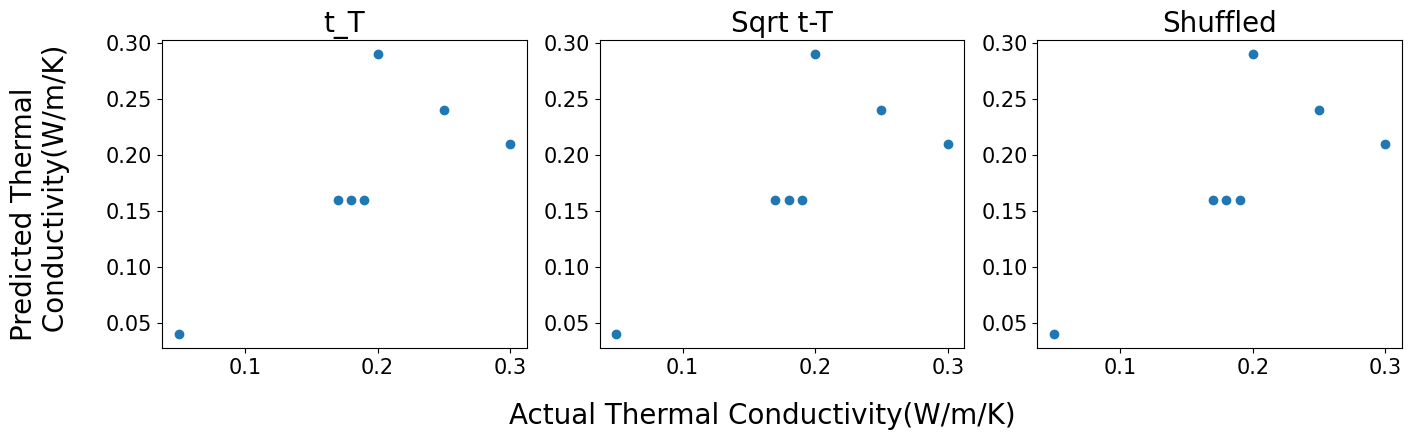

+------------+----------------------+--------------------+
| Data Type  |  Mean Squared Error  |  R-squared score   |
+------------+----------------------+--------------------+
|    t-T     | 0.002542857142857142 | 0.5039808917197455 |
| Square t-T | 0.002542857142857142 | 0.5039808917197455 |
|  Shuffled  | 0.002542857142857142 | 0.5039808917197455 |
+------------+----------------------+--------------------+
0.003 & 0.504
0.003 & 0.504
0.003 & 0.504


In [7]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result_sqrt.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


# Fit a random forest regression model to the training data
model1 = DecisionTreeRegressor(max_depth=10)
model2 = DecisionTreeRegressor(max_depth=10)
model3 = DecisionTreeRegressor(max_depth=10)


model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)


# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)

# Set up the plot grid

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)


# Add title to each subplot
axs[0].set_title('t_T',fontsize=20)
axs[1].set_title('Sqrt t-T',fontsize=20)
axs[2].set_title('Shuffled',fontsize=20)

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)


# Set common x and y labels for the plot grid
fig.text(0.5, -0.08, "Actual Thermal Conductivity(W/m/K)", ha='center',fontsize=20)
fig.text(0.03, 0.5, "Predicted Thermal \n Conductivity(W/m/K)", va='center', rotation='vertical',fontsize=20)

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)





from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])



# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))

In [8]:
X_train_sqrt

,50,51,52,53,54,55,56,57,58,59,...,142,143,144,145,146,147,148,149,Outp.power.,Radius
2,3.193744,3.224903,3.255764,3.286335,3.316625,3.346640,3.376389,3.405877,3.435113,3.464102,...,3.350565,3.357882,3.365523,3.372660,3.379350,3.385881,3.392610,3.399996,15.000,6.403
11,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,2.824600,2.830900,2.837000,2.843100,2.849200,2.855300,2.861400,2.867400,0.010,6.403
27,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,2.615900,2.621200,2.626400,2.631600,2.636800,2.642000,2.647200,2.652300,0.050,6.403
25,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,2.729100,2.734700,2.740200,2.745600,2.751100,2.756500,2.761900,2.767300,0.050,6.403
34,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,3.258900,3.265500,3.272000,3.278400,3.284800,3.291300,3.297700,3.304000,0.070,6.403
32,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,3.144300,3.150600,3.156900,3.163100,3.169200,3.175400,3.181600,3.187700,0.070,6.403
26,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,3.037800,3.043900,3.049900,3.055900,3.061800,3.067800,3.073700,3.079600,0.070,6.403
30,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,2.853200,2.859000,2.864700,2.870400,2.876100,2.881900,2.887500,2.893100,0.050,6.403
8,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,2.470100,2.475400,2.480600,2.485800,2.491000,2.496200,2.501300,2.506400,0.015,6.403
13,6.324555,6.387488,6.449806,6.511528,6.572671,6.633250,6.693280,6.752777,6.811755,6.870226,...,2.724300,2.730600,2.736800,2.743000,2.749100,2.755300,2.761500,2.767500,0.005,6.403


In [9]:
 X_test_sqrt

,50,51,52,53,54,55,56,57,58,59,...,142,143,144,145,146,147,148,149,Outp.power.,Radius
29,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.8459,2.8516,2.8572,2.8628,2.8684,2.8739,2.8795,2.8849,0.07,6.403
20,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.9895,2.9956,3.0017,3.0076,3.0136,3.0196,3.0256,3.0315,0.05,6.403
16,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.7950,2.8008,2.8065,2.8121,2.8178,2.8234,2.8291,2.8346,0.04,6.403
28,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.4162,2.4211,2.4259,2.4307,2.4355,2.4403,2.4450,2.4497,0.05,6.403
22,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.6458,2.6512,2.6566,2.6619,2.6673,2.6726,2.6779,2.6832,0.04,6.403
15,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.5121,2.5172,2.5223,2.5274,2.5324,2.5375,2.5425,2.5475,0.04,6.403
10,6.324555,6.387488,6.449806,6.511528,6.572671,6.63325,6.69328,6.752777,6.811755,6.870226,...,2.2791,2.2841,2.2890,2.2938,2.2987,2.3035,2.3084,2.3132,0.01,6.403


In [10]:
y_train_sqrt

2     0.046239
11    0.040000
27    0.230000
25    0.220000
34    0.260000
32    0.270000
26    0.280000
30    0.210000
8     0.070000
13    0.020000
5     0.030000
17    0.130000
14    0.090000
31    0.240000
24    0.140000
1     0.031713
12    0.100000
6     0.080000
23    0.160000
4     0.035857
18    0.120000
21    0.150000
19    0.110000
9     0.060000
7     0.010000
33    0.290000
3     0.033831
0     0.022209
Name: Th.Conductivity, dtype: float64

In [11]:
y_test_sqrt

29    0.30
20    0.20
16    0.17
28    0.25
22    0.18
15    0.19
10    0.05
Name: Th.Conductivity, dtype: float64

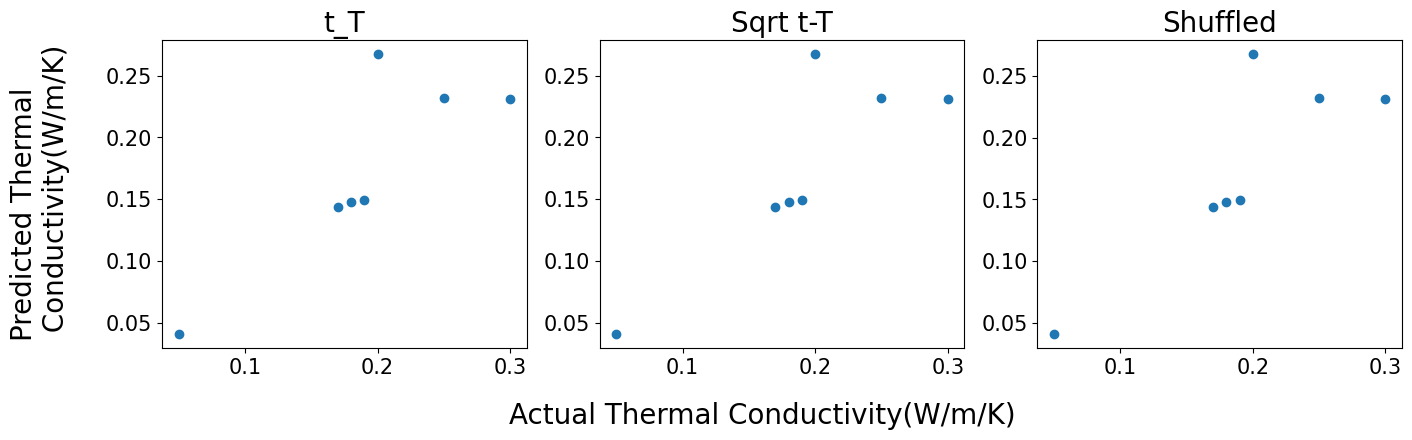

+------------+-----------------------+--------------------+------------------------------+
| Data Type  |   Mean Squared Error  |  R-squared score   | Coefficient of determination |
+------------+-----------------------+--------------------+------------------------------+
|    t-T     | 0.0018802551777675498 | 0.6332304788590368 |      0.6332304788590368      |
| Square t-T |  0.001879676820624692 | 0.6333432953399287 |      0.6333432953399287      |
|  Shuffled  | 0.0018852295482570153 | 0.6322601597747064 |      0.6322601597747064      |
+------------+-----------------------+--------------------+------------------------------+
0.002 & 0.633
0.002 & 0.633
0.002 & 0.632


In [12]:
from sklearn.ensemble import RandomForestRegressor


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :num_cols-1]
y_t_T = merge_t_parameter_result.iloc[:, num_cols-1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :num_cols-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, num_cols-1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :num_cols-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, num_cols-1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :num_cols_norm-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, num_cols_norm-1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)

# Fit a random forest regression model to the training data
model1 = RandomForestRegressor(n_estimators=1000, random_state=0)
model2 = RandomForestRegressor(n_estimators=1000, random_state=0)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)


model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)




# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)


# Add title to each subplot
axs[0].set_title('t_T',fontsize=20)
axs[1].set_title('Sqrt t-T',fontsize=20)
axs[2].set_title('Shuffled',fontsize=20)

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)


# Set common x and y labels for the plot grid
fig.text(0.5, -0.08, "Actual Thermal Conductivity(W/m/K)", ha='center',fontsize=20)
fig.text(0.03, 0.5, "Predicted Thermal \n Conductivity(W/m/K)", va='center', rotation='vertical',fontsize=20)
# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
r2_t_T = r2_score(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
r2_shuffled = r2_score(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)
r2_nomalized = r2_score(y_test_nomalized, y_pred_nomalized)
cod_t_T = 1 - mse_t_T/np.var(y_test_t_T)
cod_sqrt = 1 - mse_sqrt/np.var(y_test_sqrt)
cod_shuffled = 1 - mse_shuffled/np.var(y_test_shuffled)
cod_nomalized = 1 - mse_nomalized/np.var(y_test_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score', 'Coefficient of determination'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T),cod_t_T])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt),cod_sqrt])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled),cod_shuffled])



# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
